In [1]:
%pip install seaborn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Работа с реальными данными (20 баллов)

Напишите функции read_gff и read_bed6 для чтения соответствующих форматов. Они должны возвращать датафреймы как в примере (картинка Example1), но имена колонок можно сделать любыми.

In [3]:
def read_gff(path):
    return pd.read_csv(path, sep="\t", comment="#",
                       names=["chromosome", "source", "type", "start", "end", 
                              "score", "strand", "phase", "attributes"])

gff = read_gff('rrna_annotation.gff')
gff

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,Name=5S_rRNA;product=5S ribosomal RNA
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,Name=5S_rRNA;product=5S ribosomal RNA
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA


In [4]:
def read_bed6(path):
    names = ['chromosome', 'start', 'end', 'name', 'score', 'strand']
    return pd.read_csv(path, sep='\t', names=names)

bed6 = read_bed6('alignment.bed')
bed6

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


Колонка с атрибутами несёт слишком много избыточной информации и ей не удобно пользоваться, оставьте в ней только данные о типе рРНК одной короткой строкой (16S, 23S, 5S).

In [5]:
gff['attributes'] = gff['attributes'].apply(lambda x: x.split('Name=')[1].split('_')[0])
gff

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


Сделайте таблицу, где для каждой хромосомы (на самом деле это не хромосомы, а референсные геномы) показано количество рРНК каждого типа. Постройте barplot, отображающий эти данные (картинка rRNA_barplot)

In [6]:
gff2 = gff.iloc[:, [0, -1]]
gff2.columns = ['Sequence', 'RNA type']
gff2 = gff2.groupby(by=['Sequence', 'RNA type']).size()
gff2

Sequence      RNA type
Reference_1   16S         2
              23S         2
              5S          2
Reference_10  16S         5
              23S         5
                         ..
Reference_8   16S         2
              23S         2
Reference_9   16S         6
              23S         6
              5S          6
Length: 76, dtype: int64

<AxesSubplot:xlabel='Sequence'>

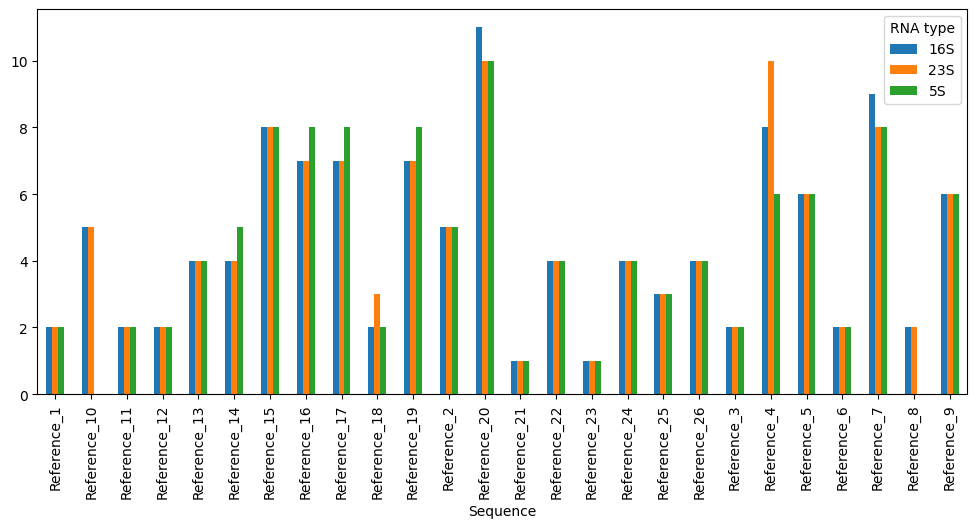

In [7]:
%matplotlib inline
gff2.unstack().plot.bar(figsize=(12,5))

In [8]:
# just a more appealing way to represent the data 
gff_cut = gff2.reset_index()
gff_cut = gff_cut.pivot(index='Sequence', columns='RNA type', values=0)
gff_cut = gff_cut.replace(np.nan, 0)
gff_cut.astype('int32').transpose()

Sequence,Reference_1,Reference_10,Reference_11,Reference_12,Reference_13,Reference_14,Reference_15,Reference_16,Reference_17,Reference_18,...,Reference_24,Reference_25,Reference_26,Reference_3,Reference_4,Reference_5,Reference_6,Reference_7,Reference_8,Reference_9
RNA type,,,,,,,,,,,,,,,,,,,,,
16S,2,5,2,2,4,4,8,7,7,2,...,4,3,4,2,8,6,2,9,2,6
23S,2,5,2,2,4,4,8,7,7,3,...,4,3,4,2,10,6,2,8,2,6
5S,2,0,2,2,4,5,8,8,8,2,...,4,3,4,2,6,6,2,8,0,6


Далее самое интересное. Мы хотим узнать сколько рРНК в процессе сборки успешно собралось. Для этого можно воспользоваться программой bedtools intersect и пересечь эти два файла. В результате сохранятся только записи об рРНК, интервал которой перекрывался с интервалом контига в выравнивании, это означает, что это ген есть в сборке. Но забудьте про bedtools! У нас тут вообще-то пандас! Поэтому давайте получим такой же результат в нём. Выведите таблицу, содержащую исходные записи об рРНК полностью вошедших в сборку (не фрагментом), а также запись о контиге в который эта РНК попала. Итоговая таблица должна выглядеть примерно так (картинка Example2). Обратите внимание, что в один контиг может попасть несколько рРНК.

In [9]:
new = pd.merge(gff, bed6, on="chromosome", how="outer")
new[(new['start_x'] >= new['start_y']) & (new['end_x'] <= new['end_y'])]

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,name,score_y,strand_y
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121855,Reference_14,barrnap:0.9,rRNA,2433040,2433152,2.000000e-12,-,.,5S,2433027,2433434,NODE_6108_length_407_cov_1153.232955,0,+
122182,Reference_14,barrnap:0.9,rRNA,3766952,3767064,2.000000e-12,-,.,5S,3766939,3767346,NODE_6108_length_407_cov_1153.232955,0,+
122583,Reference_25,barrnap:0.9,rRNA,1329370,1329473,2.900000e-10,-,.,5S,1329345,1329810,NODE_5333_length_465_cov_547.609756,0,-
125060,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S,1822575,1823040,NODE_5333_length_465_cov_547.609756,0,+


# Задание 2. Кастомизация графиков (20 баллов)

In [10]:
de = pd.read_csv('diffexpr_data.tsv.gz', sep='\t')
de

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000
...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000


In [11]:
def label_maker(p,fold):
    part1 = ('Non-s', 'S')[p < 0.05]
    part2 = ('up', 'down')[fold < 0]
    return part1 + 'ignificantly ' + part2 + 'regulated'

In [12]:
de['labels'] = de.apply(lambda x: label_maker(x.pval_corr, x.logFC), axis=1)

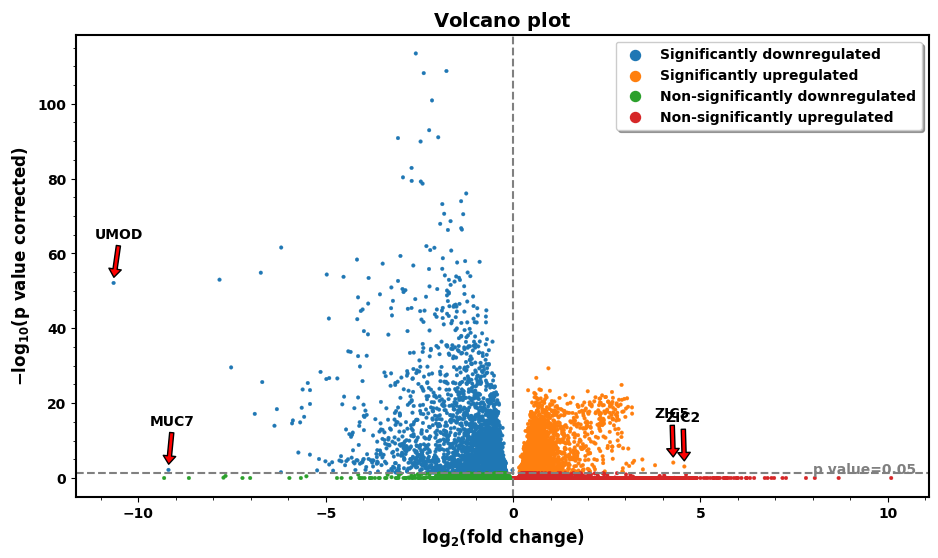

In [15]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(11,6))
plt.setp(ax.spines.values(), linewidth=1.5)
sns.scatterplot(data=de.sort_values('labels', key=lambda col: col.str.startswith('N')), 
                x='logFC', y='log_pval', hue='labels', edgecolor=None, s=7)

plt.axvline(x = 0, color='gray', linestyle='--', linewidth=1.5)
plt.axhline(-np.log10(0.05), color='gray', linestyle='--', linewidth=1.5)
plt.text(8, -np.log10(0.05), 'p value=0.05', weight='bold', fontsize=10, c='gray')

plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.bf'] = 'Sans Serif:italic:bold'
plt.xlabel(r'$\mathbf{\bf{log_2(fold \ change)}}$', size=12)
plt.ylabel(r"$\mathbf{\bf{-log_{10}(p \ value \ corrected)}}$", size=12)
plt.title(r'$\mathbf{\bf{Volcano \ plot}}$', size=14)

plt.minorticks_on()
plt.xticks(weight='bold')
plt.yticks(weight='bold')
plt.xlim(de.logFC.min() - 1, de.logFC.max() + 1)
plt.ylim(de.log_pval.min() - 5, de.log_pval.max() + 5)

import matplotlib.font_manager as font_manager
import matplotlib as mpl
myfont1 = mpl.font_manager.FontProperties(weight='bold', family='sans-serif')
plt.legend(prop=myfont1, fontsize=10, markerscale=1.2, shadow=True)

smol = de[de['labels'].str.startswith('S')].nsmallest(2, 'logFC')
chonk = de[de['labels'].str.startswith('S')].nlargest(2, 'logFC')
for i in [smol, chonk]:
    for j in range(2):
        row = i.iloc[j, :]
        plt.annotate(row['Sample'], xy=(row['logFC'], row['log_pval'] + 1), 
                     xytext=(row['logFC'] - 0.5, row['log_pval'] + 12), 
                     weight='bold',
                     arrowprops=dict(facecolor='r', width=3, 
                                 headwidth=9, headlength=6, shrink=0.05))
    
plt.savefig('volcano_plot.png', dpi=200, bbox_inches='tight', 
            facecolor='w', transparent=True)

Additional: just for fun the same plot by other libraries. NO fancy

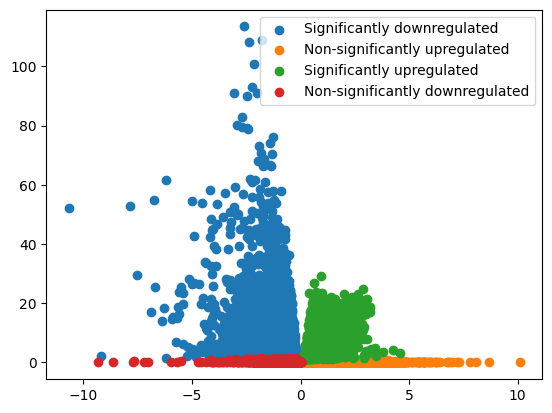

In [13]:
label_names = list(set(de['labels']))
for i in range(4):
    lab_inter = de[de['labels'] == label_names[i]]
    plt.scatter(lab_inter['logFC'], lab_inter['log_pval'], label=label_names[i])

plt.legend()

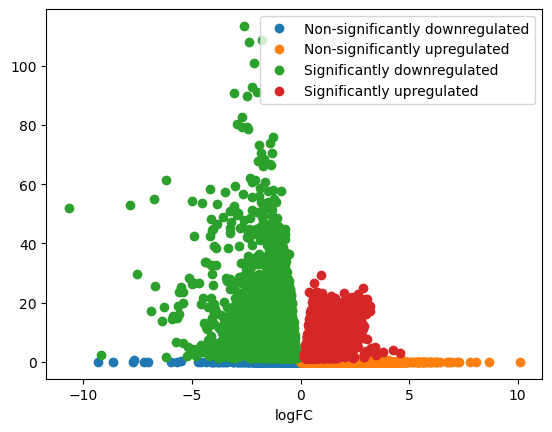

In [14]:
de.set_index('logFC').sort_index().groupby('labels')['log_pval'].plot(style='o')
plt.legend()